# Задача 1

In [1]:
import pandas as pd
import numpy as np
from scipy import special
from scipy import linalg
import matplotlib.pyplot as plt

MIN = -10
MAX =  10

def get_random_matrix(size = None): 
    return np.random.uniform(-10, 10, size)

#Генератор по пунктам
class matrix_generator():
    def __init__(self, MIN, MAX):
        self.MIN = MIN
        self.MAX = MAX
    def random_matrix(self, size = None): 
        return np.random.uniform(MIN, MAX, size)
    def diagonal_matrix(self, n):
        M = np.zeros([n, n])
        np.fill_diagonal(M, get_random_matrix(n))
        return M
    def up_triangle(self, n):
        return np.triu(get_random_matrix([n, n]))
    def down_triangle(self, n):
        return np.triu(get_random_matrix([n, n])).T
    def symmetrical_mtrix(self, n):
        M = get_random_matrix([n, n])
        return (M.T+M)/2
    def degen(self, size):
        M = get_random_matrix(size)
        M[0] = 0*M[1]
        return M
    def lad(self, n, m):
        M = np.triu(get_random_matrix([n, n]))
        M[M:]=0
        return M
    def random_perturbation(self, size, epsilon):
        return np.random.uniform(-epsilon, epsilon, size)


Вероятность вырождения матрицы - вероятность нулевой строчки или столбца. С данным типом данных и диапазоном, вероятность генерации 0 - $1:10^{15}$, тогда, вероятность генерации вырожденной матрицы - порядка $10^{-15n}$, где n - размер матрицы.

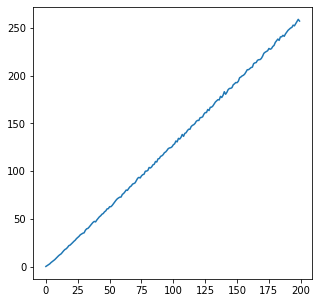

In [2]:
Matrix = matrix_generator(-10,10)
Y = np.zeros(200)
for n in range(200):
    results = np.zeros(30)
    for i in range(30):
        A = Matrix.random_perturbation([n + 1,n + 1], 0.0005)
        results[i] = ((np.amax(np.linalg.eigvals(A.T @ A)))**0.5) / 0.0005
    Y[n] = results.mean()

fig,ax=plt.subplots(1,1,figsize=(5,5))

plt.plot(np.arange(200),Y**2)

L2 норма матрицы возмущений примерно в $\sqrt N$ раз превышает $\varepsilon$, N - размер матрицы.

# Задача 2

In [3]:
class functions():
    def exp(x, modified=True):
        flag = False
        if modified == True:
            if x < 0:
                flag = True
                x = abs(x)
        y = 0
        n = 1
        term  = 1
        while y != y + term:
            y = y + term
            term  = term * x/ n
            n += 1 
        if flag == True and modified == True:
            y = 1 / y

        return y
    
    def ln(x):
        n = 1
        while x**(1/n) > 2 :
            n +=1
        x = x**(1/n) -1
        term = x
        k = 1
        y = 0
        while y != y + term:
            y = y + term
            term = -term * x * k /(k+1) 
            k += 1
        return y*n

    def sin(x, modified=True):
        y = 0
        n = 1
        flag = False
        if modified:
            x = x % (2 * np.pi) 
            if (x > np.pi):
                flag = True
                x -= np.pi

        term = x
        while y != y + term:
            y = y + term
            term = term*x*x/((n+2)*(n+1))*(-1)
            n += 2
        if flag:
            y = -y
        return y
    
    def cos(x, modified=True):
        y = 0
        n = 0
        flag = False
        if modified:
            x = x % (2 * np.pi) 
            if (x > np.pi):
                flag = True
                x -= np.pi

        term = 1
        while y != y + term:
            y = y + term
            term = term*x*x/((n+2)*(n+1))*(-1)
            n += 2
        if flag:
            y = -y
        return y

    #Чисто технически, эти функции вычислены с помощью рядов маклорена)))
    def tan(x, modified=True):
        return sin(x, modified = modified)/cos(x, modified = modified)
            
    def cot(x, modified=True):
        return cos(x, modified = modified)/sin(x, modified = modified)
    
    def asin(x, modified=True):
        pass
    
    def acos(x, modified=True):
        return np.pi/2-asin(x, modified=modified)
    
    def atan(x, modified=True):
        pass
    
    def sh(x, modified=True):
        return (exp(x, modified = modified)-exp(-x, modified = modified))/2
    
    def ch(x, modified=True):
        return (exp(x, modified = modified)+exp(-x, modified = modified))/2
        
    def th(x, modified=True):
        return sh(x, modified = modified)/ch(x, modified = modified)
        
    def ath():
        pass

# Задача 3

In [4]:
def L2(M, treat_array_as_vector=True):
    if treat_array_as_vector == True:
        if len(M.shape) == 1:
            M = M.reshape((-1, 1))
    return (np.amax(np.linalg.eigvals(M.T @ M)))**0.5

def L1(M, treat_array_as_vector=True):
    if treat_array_as_vector == True:
        if len(M.shape) == 1:
            M = M.reshape((-1, 1))
    M = np.abs(M)
    return np.amax(np.sum(M, axis=0))

def L_cube(M, treat_array_as_vector=True):
    if treat_array_as_vector == True:
        if len(M.shape) == 1:
            M = M.reshape((-1, 1))
    M = np.abs(M)
    return np.amax(np.sum(M, axis=1))

def cond_number(M, norm):
    if M.shape[0] != M.shape[1]:
        return np.infty
    if np.linalg.matrix_rank(M) != M.shape[0]:
        return np.infty
    return norm(M) * norm(np.linalg.inv(M))

# Задача 4

In [5]:
def Gauss(M):
    n = np.shape(M)[0]
    for i in range(0, n - 1):
        nonzeros = np.nonzero(M[i:,i])
        if nonzeros[0].size != 0 :
            k = nonzeros[0][0]
            M[[i, k + i]] = M[[k + 1, i]]
            
            for j in range(i + 1, n):
                k = M[j, i] / M[i, i] 
                M[j, :] = M[j, :] - k * M[i, :]

def rk(M):
    Gauss(M)
    return M.shape[0] - np.sum(np.sum((M != 0), axis=1)==0)

In [7]:
M = matrix_generator(-10,10)                    
B = M.random_matrix([3,4])

print("Вот рандомная матрица:\n")
print(B,"\n")

print("Вот её Гауссова форма:\n")
Gauss(B)
print(B,"\n")

for i in (1,2):
    A = M.degen([i+2,i+2])
    print("Вот рандомная вырожденная матрица:\n")
    print(A,"\n")
    Gauss(A)
    print("Вот её Гауссова форма:\n")
    print(A,"\n")
    print("Её ранг:",rk(A),"\n")


Вот рандомная матрица:

[[-3.01297303 -2.28560233  7.23260292  4.05644637]
 [-6.84679874  1.684519    8.86212034 -1.81348334]
 [ 2.1071131  -8.1252832   9.13486308  1.12708086]] 

Вот её Гауссова форма:

[[ -3.01297303  -2.28560233   7.23260292   4.05644637]
 [  0.           6.87841189  -7.5735318  -11.03151206]
 [  0.           0.           3.48658821 -11.63082538]] 

Вот рандомная вырожденная матрица:

[[ 0.          0.          0.        ]
 [ 5.03628063  1.97031327  7.5877874 ]
 [-7.06342729 -8.63414941  9.79211953]] 

Вот её Гауссова форма:

[[-7.06342729 -8.63414941  9.79211953]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]] 

Её ранг: 1 

Вот рандомная вырожденная матрица:

[[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]
 [ 1.23685602e+00 -3.79289240e+00 -5.46071458e+00  8.91419875e+00]
 [-3.95356672e+00  7.02150335e-01  7.49213298e+00  4.47447155e+00]
 [-5.71843140e+00 -1.40777379e+00  1.28869571e-03  5.23911655e+00]] 

Вот её Г

# Задача 5

In [13]:
def Solve(A, b):#сложность O(N^3)
    n = A.shape[0]
    M = np.hstack((A, np.reshape(b,(n, 1)))).astype(float)
    Gauss(M)
    n, m = M.shape
    solution = np.zeros(n)
    for k in range(n-1, -1, -1):
        M[:k, m-1] = M[:k, m-1] - M[:k, k]*M[k, m-1]/M[k, k]
        solution[k] = M[k, m-1]/M[k, k]
        
    return solution

# Задача 6

Число обусловлености для рассчета:  0.5351486678147395
Число обусловлености :  342.06284364599435 



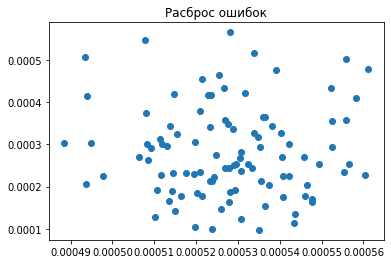

In [31]:
N = 200
Matrix = matrix_generator(-10,10)
A = Matrix.random_matrix([N,N])
b = 20*np.random.rand(N, 1)

x = Solve(A, b)
norm_x = L2(x)
norm_b = L2(b)
errx = []
errb = []
epsilon = 0.01
for i in range(100):
    db = -epsilon + 2*epsilon*np.random.rand(N, 1)
    xn = Solve(A, b+db)
    dx = xn - x
    errx.append(L2(dx)/norm_x)
    errb.append(L2(db)/norm_b)
    
import matplotlib.pyplot as plt

plt.scatter(errb, errx)
plt.title("Расброс ошибок")
plt.plot()

print("Число обусловлености для рассчета: ", np.mean(np.array(errx) / np.array(errb)))
print("Число обусловлености : ", L2(A)*L2(np.linalg.inv(A)),"\n")